<a href="https://colab.research.google.com/github/maksmanikowski/neural_networks/blob/main/dl01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Excercise 1: Perceptron
- define _step function_ that takes value (z) and returns 
Heaviside step function\
$
Heaviside(z) =
\begin{cases}
0\ \text{if}\ z<0\\
1\ \text{if}\ z \ge 0
\end{cases}
$
- define _Perceptron_ function that takes:
    - data: numpy array of shape (m,n)
    - labels: numpy array of shape (m,1)
    - lr: learning rate ($\eta$)
    - e: number of epochs
- add bias term (column with values equal to 1)
- initialize weights with zeros
- loop through epochs
    - loop through instances
        - compute output($\hat{y}$) as $Heaviside(z)$, where $z = x^T w$\
        NOTE: rows of X contain transposed data so use np.dot(x[i], w)
        - calculate new weights $w_{i,j}^{(next\,step)} = w_{i,j}+\eta(y_j-\hat y_j)x_i$
- return trained weights
- draw decision boundary
        



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class_size = 50
np.random.seed(42)
# Generate data points
X1 = np.random.normal(0,1,(class_size,2)).round(1)
X2 = np.random.normal(0,1,(class_size,2)).round(1)+np.random.randint(-5,5, (1,2))
X_train = np.concatenate((X1, X2)) # size (100, 2)
X_train[:5]

array([[ 0.5, -0.1],
       [ 0.6,  1.5],
       [-0.2, -0.2],
       [ 1.6,  0.8],
       [-0.5,  0.5]])

In [ ]:
X_train.shape

(100, 2)

In [ ]:
# Generate labels
y_train = np.concatenate((np.zeros(class_size),np.ones(class_size))) # len=100
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

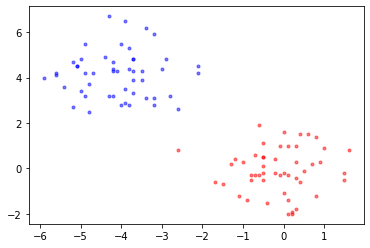

In [ ]:
#plot data points
def plot_data(X,y):
    # plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r.',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'b.',alpha=0.5)

plot_data(X_train,y_train)

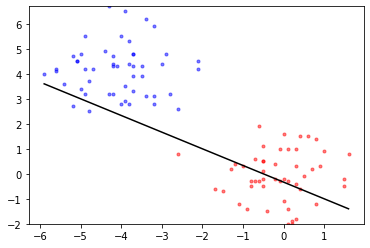

In [ ]:
# plot (dummy) decision boundary
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))

# Dummy weights
w_dummy = [1,2,3]

plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_dummy)

In [ ]:
#np.random.seed(42)
#weights = np.random.normal(0, 1, 3)
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])
weights

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [ ]:
bias = 1

In [ ]:
weights[0] * bias + weights[1] * X_train[0, 0] + weights[2] * X_train[0, 1]

0.36281314600000003

In [ ]:
np.dot(X_train[0], weights[1:]) + 1 * weights[0]

0.36281314600000003

In [ ]:
def heaviside(z):
    if z >= 0:
        return 1
    else:
        return 0

In [ ]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])

for i in range(0, 5): # for each example (0 to 99) # X_train.shape[0]
    print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
    # make prediction
    z = np.dot(X_train[i], weights[1:]) + weights[0] * bias
    pred = heaviside(z)
    print(f'Dot product = {z:.2f}, so the prediction is = {pred:.1f}')
    # update weights
    print(f'Previous bias weight was {weights[0]}')
    weights[0] += 0.1 * (y_train[i] - pred)
    print(f'Current bias weight is {weights[0]}')
    print(weights[1:])
    weights[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
    print(weights[1:])

Feature vector is [ 0.5 -0.1] and the label 0.0
Dot product = 0.36, so the prediction is = 1.0
Previous bias weight was 0.49671415
Current bias weight is 0.39671415
[-0.1382643   0.64768854]
[-0.1882643   0.65768854]
Feature vector is [0.6 1.5] and the label 0.0
Dot product = 1.27, so the prediction is = 1.0
Previous bias weight was 0.39671415
Current bias weight is 0.29671415
[-0.1882643   0.65768854]
[-0.2482643   0.50768854]
Feature vector is [-0.2 -0.2] and the label 0.0
Dot product = 0.24, so the prediction is = 1.0
Previous bias weight was 0.29671415
Current bias weight is 0.19671415
[-0.2482643   0.50768854]
[-0.2282643   0.52768854]
Feature vector is [1.6 0.8] and the label 0.0
Dot product = 0.25, so the prediction is = 1.0
Previous bias weight was 0.19671415
Current bias weight is 0.09671415
[-0.2282643   0.52768854]
[-0.3882643   0.44768854]
Feature vector is [-0.5  0.5] and the label 0.0
Dot product = 0.51, so the prediction is = 1.0
Previous bias weight was 0.09671415
Curre

In [ ]:
y_pred = np.dot(X_train[:5], weights[1:]) + bias * weights[0]
for i in range(0, 5):
    print(y_train[i], y_pred[i])

0.0 -0.212186854
0.0 0.39028838
0.0 -0.015170697999999998
0.0 -0.22635789800000006
0.0 0.36469056999999994


Let's try to implement the activation function now

In [ ]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])

print(weights[0])
print(weights[1:])
weights_update = np.zeros(3)

for i in range(0, 5): # for each example (0 to 99) # X_train.shape[0]
    print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
    # make prediction
    z = np.dot(X_train[i], weights[1:]) + weights[0] * bias
    pred = heaviside(z)
    # update weights
    weights_update[0] += 0.1 * (y_train[i] - pred)
    print(weights_update[0])
    weights_update[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
    print(weights_update[1:])

weights[0] += weights_update[0]
weights[1:] += weights_update[1:]
print(f'New bias weight {weights[0]}')
print(f'New weights {weights[1:]}')

0.49671415
[-0.1382643   0.64768854]
Feature vector is [ 0.5 -0.1] and the label 0.0
-0.1
[-0.05  0.01]
Feature vector is [0.6 1.5] and the label 0.0
-0.2
[-0.11 -0.14]
Feature vector is [-0.2 -0.2] and the label 0.0
-0.30000000000000004
[-0.09 -0.12]
Feature vector is [1.6 0.8] and the label 0.0
-0.4
[-0.25 -0.2 ]
Feature vector is [-0.5  0.5] and the label 0.0
-0.5
[-0.2  -0.25]
New bias weight -0.003285849999999979
New weights [-0.3382643   0.39768854]


In [ ]:
y_pred = np.dot(X_train[:5], weights[1:]) + bias * weights[0]
for i in range(0, 5):
    print(y_train[i], y_pred[i])

0.0 -0.21218685399999998
0.0 0.39028838000000005
0.0 -0.01517069799999997
0.0 -0.22635789800000003
0.0 0.36469057


Same results obtained - ~~doesn't matter here if we update weights after one example or after an epoch~~ - only because predictions didn't change after weights updating!

In [ ]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])

for i in range(0, 5): # for each example (0 to 99) # X_train.shape[0]
    print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
    # make prediction
    pred = np.dot(X_train[i], weights[1:]) + weights[0] * bias
    # update weights
    print(weights[0])
    weights[0] += 0.1 * (y_train[i] - pred)
    print(weights[0])
    print(weights[1:])
    weights[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
    print(weights[1:])

Feature vector is [ 0.5 -0.1] and the label 0.0
0.49671415
0.4604328354
[-0.1382643   0.64768854]
[-0.15640496  0.65131667]
Feature vector is [0.6 1.5] and the label 0.0
0.4604328354
0.32607634857900003
[-0.15640496  0.65131667]
[-0.23701885  0.44978194]
Feature vector is [-0.2 -0.2] and the label 0.0
0.32607634857900003
0.29772397555781804
[-0.23701885  0.44978194]
[-0.23134837  0.45545242]
Feature vector is [1.6 0.8] and the label 0.0
0.29772397555781804
0.2685311247015555
[-0.23134837  0.45545242]
[-0.27805694  0.43209814]
Feature vector is [-0.5  0.5] and the label 0.0
0.2685311247015555
0.20617025866609445
[-0.27805694  0.43209814]
[-0.2468765  0.4009177]


In [ ]:
y_pred = np.dot(X_train[:5], weights[1:]) + bias * weights[0]
for i in range(0, 5):
    print(y_train[i], y_pred[i])

0.0 0.0426402368827683
0.0 0.6594209099766963
0.0 0.17536201886822592
0.0 0.13190201534504603
0.0 0.5300673613014188


In [ ]:
weights = np.array([ 0.49671415, -0.1382643 ,  0.64768854])

print(weights[0])
print(weights[1:])
weights_update = np.zeros(3)

for i in range(0, 5): # for each example (0 to 99) # X_train.shape[0]
    print(f'Feature vector is {X_train[i]} and the label {y_train[i]}')
    # make prediction
    pred = np.dot(X_train[i], weights[1:]) + weights[0] * bias
    # update weights
    weights_update[0] += 0.1 * (y_train[i] - pred)
    print(weights_update[0])
    weights_update[1:] += 0.1 * (y_train[i] - pred) * X_train[i]
    print(weights_update[1:])

weights[0] += weights_update[0]
weights[1:] += weights_update[1:]
print(f'New bias weight {weights[0]}')
print(f'New weights {weights[1:]}')

0.49671415
[-0.1382643   0.64768854]
Feature vector is [ 0.5 -0.1] and the label 0.0
-0.0362813146
[-0.01814066  0.00362813]
Feature vector is [0.6 1.5] and the label 0.0
-0.17481015260000002
[-0.10125796 -0.20416513]
Feature vector is [-0.2 -0.2] and the label 0.0
-0.21429308280000003
[-0.09336137 -0.19626854]
Feature vector is [1.6 0.8] and the label 0.0
-0.29365729300000004
[-0.22034411 -0.25975991]
Feature vector is [-0.5  0.5] and the label 0.0
-0.38262635000000006
[-0.17585958 -0.30424444]
New bias weight 0.11408779999999996
New weights [-0.31412388  0.3434441 ]


In [ ]:
y_pred = np.dot(X_train[:5], weights[1:]) + bias * weights[0]
for i in range(0, 5):
    print(y_train[i], y_pred[i])

0.0 -0.07731855132400003
0.0 0.4407796266319999
0.0 0.10822375560799997
0.0 -0.1137551279360001
0.0 0.44287179285999995


Second approach is better because it takes into consideration total cost of misclassifying datapoints and doesn't care if the optimum doesn't provide good prediction for only one outlier. For updating after each example the examples with big single cost would cause weight to change drastically just in favor of this one observation and it would be hard for algorithm to converge - TRY!

## Previous version

In [ ]:
def step_function(z):
    if z < 0:
      return 0
    if z >= 0:
      return 1

def perceptron(data, labels, lr, e):
    """
    data: numpy array of shape (m,n)
    labels: numpy array of shape (m,1)
    lr: learning rate
    e: number of epochs
    """
    bias = np.ones((data.shape[0], 1)) #len=100
    data = np.append(bias, data, axis=1)
    weights = [0, 0, 0]

    for epoch in range(0, e):
      for i in range(0, data.shape[0]): # for each example
        z = np.dot(data[i], weights) 
        y_pred = step_function(z)
        for j, w in enumerate(weights):
          weights[j] = w + lr*(labels[i] - y_pred) * data[i][j]
      print(weights)
    return weights

w = perceptron(X_train, y_train, 0.1, 20)
w

[-0.20000000000000004, -0.48000000000000004, 0.34]
[-0.6, -0.54, 0.29000000000000004]
[-0.7999999999999999, -0.5900000000000001, 0.44000000000000006]
[-0.9999999999999999, -0.5800000000000001, 0.45000000000000007]
[-1.0999999999999999, -0.52, 0.44000000000000006]
[-1.2, -0.41000000000000003, 0.5900000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]
[-1.3, -0.35000000000000003, 0.4000000000000001]


[-1.3, -0.35000000000000003, 0.4000000000000001]

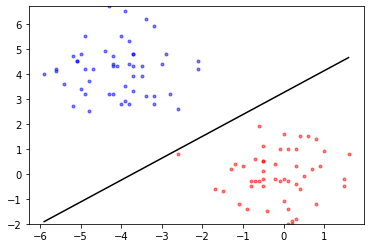

In [ ]:
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))
    
plot_data(X_train,y_train)
plot_decision_boundary(X_train, w)

07.03

perceptron limitations:
- no probability
- XOR - smaller than 0 and more than 3

multilayer
- extra hidden layer, fully connected with input and output

backpropagation
- step function doesnt allow calculating the gradient - we can use activation function for that purpose (sigmoid)
1. make prediction
2. apply activation function (sigmoid)
3. outputs as inputs to the next layer
4. count error and update weights (for every layer)

forward pass, intermediate results for each neuron, count error, chain rule

CAUTION: you cant initialize weights with the same values (so that they cant behave as a one neuron), random may be not good enough either

many activation functions (sigmoid, RELU, tanh)

slide 30 - how many parameters needs to be optimized

validation dataset for overfitting (validating against train and validation data, to see the breaking point)
